In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

## 1.1 Read the Dataset and doing Descriptive stats.

In [2]:
transport = pd.read_csv(r"C:\Users\Akshay\Desktop\intro to phython\ML\project\Transport.csv")

In [3]:
transport.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
transport.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [5]:
transport.rename(columns = {'Work Exp' : 'Work_Exp'}, inplace = True)

In [6]:
pd.DataFrame(data = [transport.mean(), transport.median(), transport.var(), transport.std()],
             index = ['Mean', 'Median', 'Variance', 'Standard_Deviation']).round(2)

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license
Mean,27.75,0.75,0.25,6.30,16.24,11.32,0.23
Median,27.00,1.00,0.00,5.00,13.60,11.00,0.00
Variance,19.51,0.19,0.19,26.13,109.28,13.00,0.18
Standard_Deviation,4.42,0.43,0.43,5.11,10.45,3.61,0.42


In [7]:
pd.DataFrame(data = transport.mode())

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,26,Male,1,0,4,14.6,12.2,0,Public Transport


## 1.2  Perform EDA

In [8]:
transport.shape

(444, 9)

In [9]:
transport.dtypes

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work_Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [10]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [11]:
transport.isna().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work_Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

<AxesSubplot:>

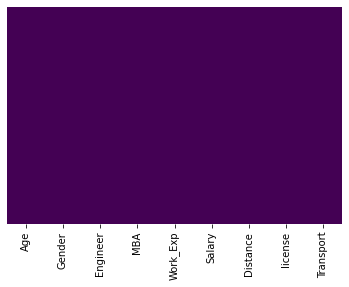

In [12]:
sns.heatmap(transport.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)

In [13]:
missing_values = pd.DataFrame(transport.isna().sum().reset_index())
missing_values.columns = ['Features', 'Missing Count']
missing_values['% missing'] = round(missing_values['Missing Count'] / transport.shape[0] * 100, 2)
missing_values

,Features,Missing Count,% missing
0,Age,0,0.0
1,Gender,0,0.0
2,Engineer,0,0.0
3,MBA,0,0.0
4,Work_Exp,0,0.0
5,Salary,0,0.0
6,Distance,0,0.0
7,license,0,0.0
8,Transport,0,0.0


In [14]:
dups = transport.duplicated()
print("The total number of duplicates present in the dataset is : ", dups.sum())

The total number of duplicates present in the dataset is :  0


In [15]:
transport[['Gender', 'Engineer', 'MBA', 'Work_Exp', 'license']].nunique()

Gender       2
Engineer     2
MBA          2
Work_Exp    24
license      2
dtype: int64

In [16]:
transport['Work_Exp'].unique()

array([ 4,  7,  5,  3,  1,  2,  9, 13,  6,  8,  0, 11, 10, 19, 16, 12, 21,
       17, 14, 18, 15, 20, 22, 24], dtype=int64)

In [17]:
print("The unique elements in Gender column is   :",transport['Gender'].unique())
print("The unique elements in Engineer column is :",transport['Engineer'].unique())
print("The unique elements in MBA column is      :",transport['MBA'].unique())
print("The unique elements in license column is  :",transport['license'].unique())

The unique elements in Gender column is   : ['Male' 'Female']
The unique elements in Engineer column is : [0 1]
The unique elements in MBA column is      : [0 1]
The unique elements in license column is  : [0 1]


In [18]:
pd.DataFrame(data = [transport['Engineer'].value_counts(), transport['license'].value_counts(), transport['MBA'].value_counts()],
            index = ['Engineer', 'license', 'MBA']).T

,Engineer,license,MBA
0,109,340,332
1,335,104,112


In [19]:
for feature in transport.columns: 
    if transport[feature].dtype == 'object': 
        print(feature)
        print(transport[feature].value_counts())
        print('\n')

Gender
Male      316
Female    128
Name: Gender, dtype: int64


Transport
Public Transport     300
Private Transport    144
Name: Transport, dtype: int64




## Univariate Analysis

In [20]:
transport.describe().round(2)

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license
count,444.00,444.00,444.00,444.00,444.00,444.00,444.00
mean,27.75,0.75,0.25,6.30,16.24,11.32,0.23
std,4.42,0.43,0.43,5.11,10.45,3.61,0.42
min,18.00,0.00,0.00,0.00,6.50,3.20,0.00
25%,25.00,1.00,0.00,3.00,9.80,8.80,0.00
50%,27.00,1.00,0.00,5.00,13.60,11.00,0.00
75%,30.00,1.00,1.00,8.00,15.72,13.42,0.00
max,43.00,1.00,1.00,24.00,57.00,23.40,1.00


Age


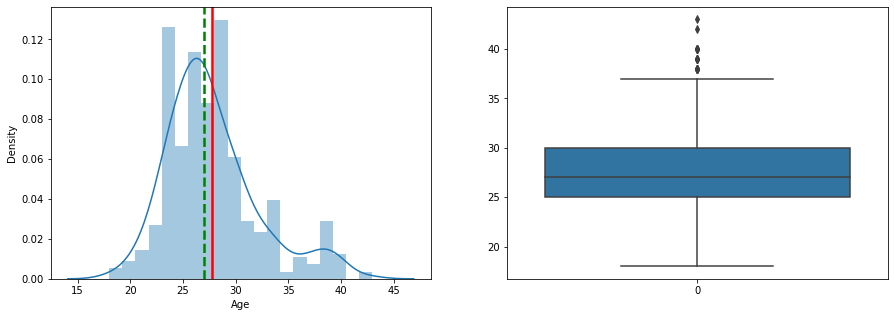

Work_Exp


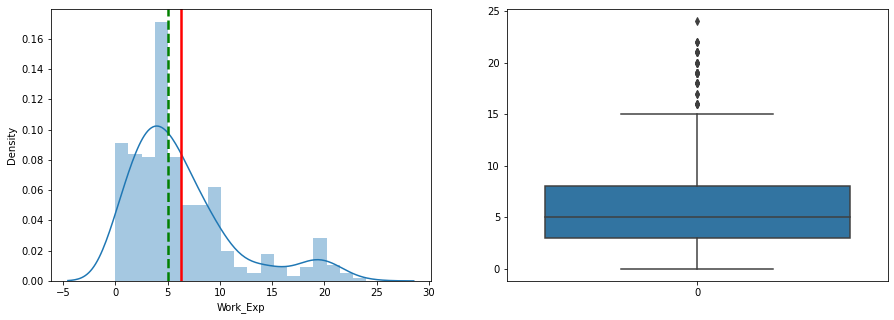

Salary


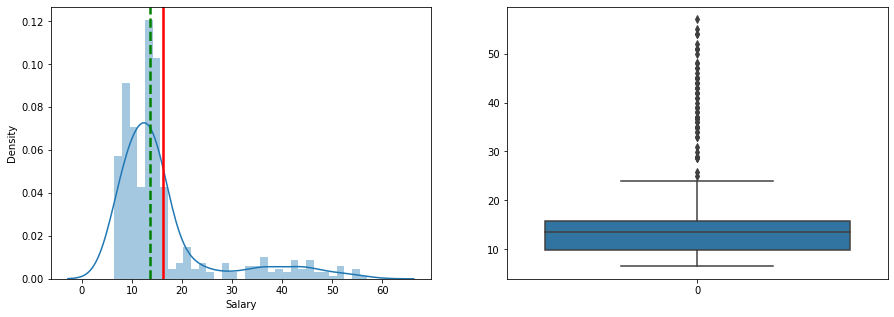

Distance


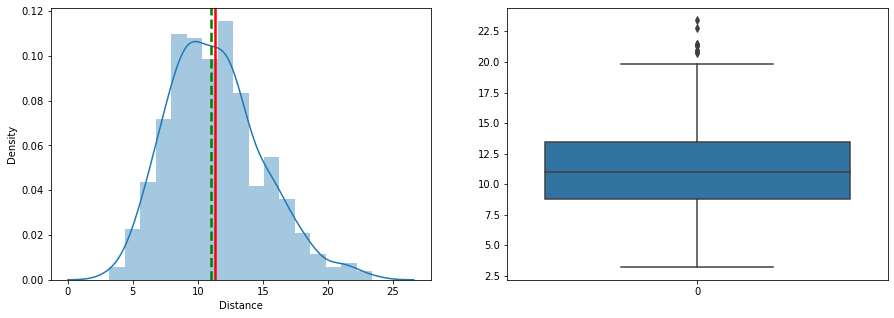

Engineer


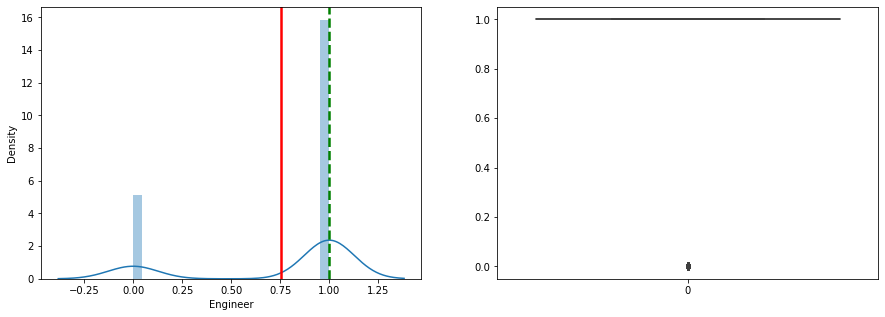

MBA


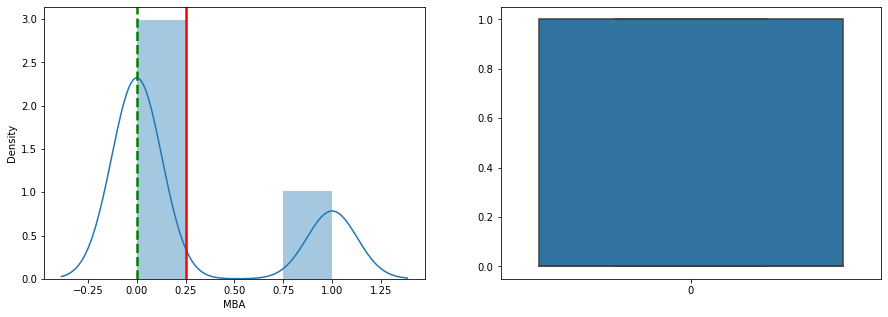

license


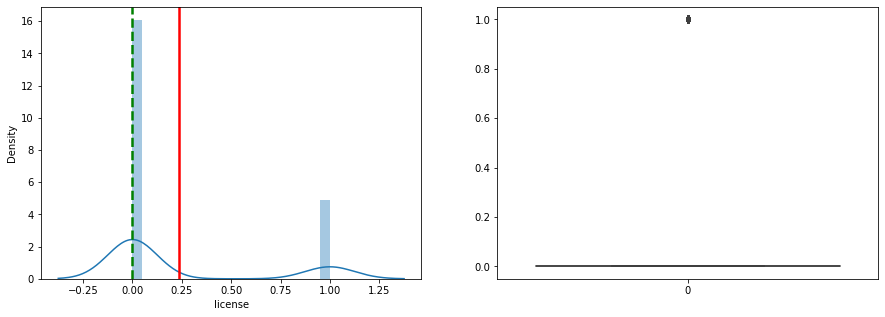

In [21]:
## For continuous variables
cols = ['Age', 'Work_Exp', 'Salary', 'Distance', 'Engineer', 'MBA', 'license']
for col in cols:
    print(col)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(transport[col], kde = True)
    plt.axvline(transport[col].mean(), ymin = 0, ymax = 1, linewidth = 2.5, color = 'red')
    plt.axvline(transport[col].median(), ymin = 0, ymax = 1, linewidth = 2.5, color = 'green', linestyle = '--')
    plt.subplot(122)
    sns.boxplot(data = transport[col])
    
    plt.show()
    

In [22]:
# def UnivariateAnalysis_numeric(column):
#     plt.figure()
#     print("Distribution Plot of " +column)
#     print("-----------------------------------------------------------------------")
#     sns.distplot(transport[column], kde = False)
#     plt.show()
    
#     print('Box Plot of ' + column)
#     print("-----------------------------------------------------------------------")
#     ax = sns.boxplot(x = transport[column])
#     plt.show()

In [23]:
# df_num = transport.select_dtypes(include = ['float64', 'int64'])
# listnumericcolumns = list(df_num.columns.values)
# len(listnumericcolumns)

In [24]:
# for x in listnumericcolumns:
#     UnivariateAnalysis_numeric(x)

In [25]:

# fig, ax = plt.subplots(2, 4, figsize=(16,10))
# ax = ax.flatten()

# for i, c in enumerate(df_num):
#     sns.boxplot(df_num[c], ax = ax[i])
# plt.suptitle('Outlier analysis Box plot')
# plt.tight_layout()

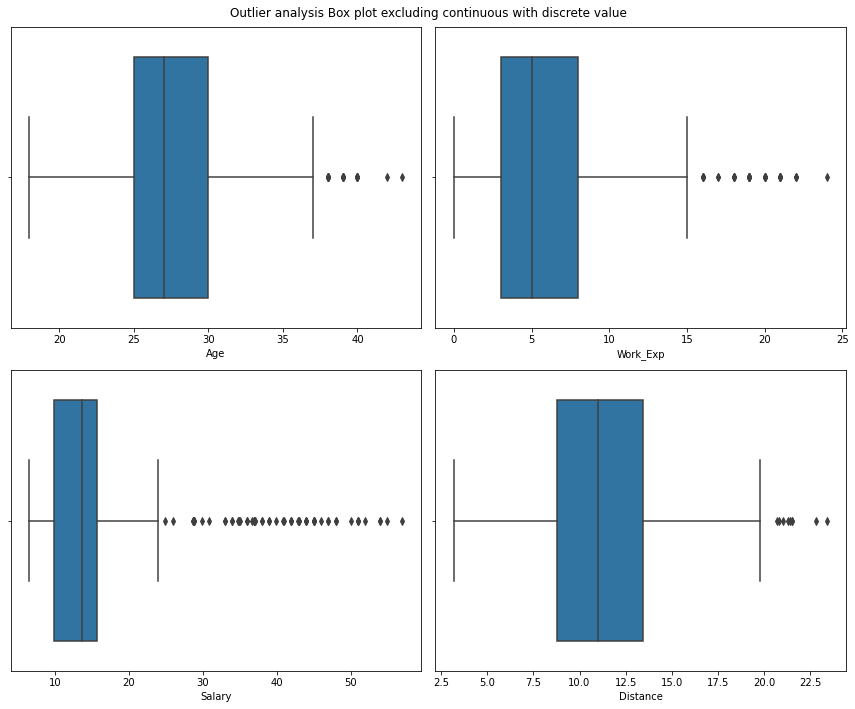

In [26]:
df_num_new = [c for c in transport.columns if (transport[c].dtypes != 'object') & (transport[c].nunique() > 2)]
fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(df_num_new):
    sns.boxplot(transport[col], ax = ax[i])
plt.suptitle('Outlier analysis Box plot excluding continuous with discrete value')
plt.tight_layout()

#### Percentage of outliers

In [27]:
Q1 = transport[['Age', 'Work_Exp', 'Salary', 'Distance']].quantile(0.25)
Q3 = transport[['Age', 'Work_Exp', 'Salary', 'Distance']].quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((transport[['Age', 'Work_Exp', 'Salary', 'Distance']] 
               < (Q1 - 1.5 * IQR)) | (transport[['Age', 'Work_Exp', 'Salary', 'Distance']] 
                                     > (Q3 + 1.5 *IQR))).sum() / transport.shape[0] * 100).round(2), columns = ['% Outliers'])

,% Outliers
Age,5.63
Work_Exp,8.56
Salary,13.29
Distance,2.03


In [28]:
pd.DataFrame(data = [transport.kurtosis(), transport.skew()], index = ['Kurtosis', 'Skew']).T.round(3)

,Kurtosis,Skew
Age,0.939,0.955
Engineer,-0.594,-1.187
MBA,-0.693,1.145
Work_Exp,1.479,1.353
Salary,3.479,2.045
Distance,0.191,0.540
license,-0.416,1.259


### Univariate analysis for categorical columns

In [29]:
transport.describe(include = 'object')

,Gender,Transport
count,444,444
unique,2,2
top,Male,Public Transport
freq,316,300


<AxesSubplot:xlabel='Transport', ylabel='count'>

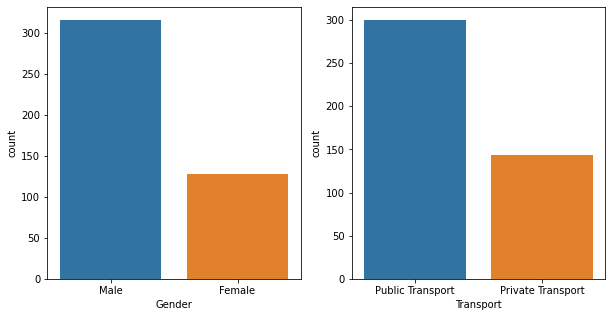

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(transport['Gender'])
plt.subplot(122)
sns.countplot(transport['Transport'])

### Bi-variate analysis for continuous columns.

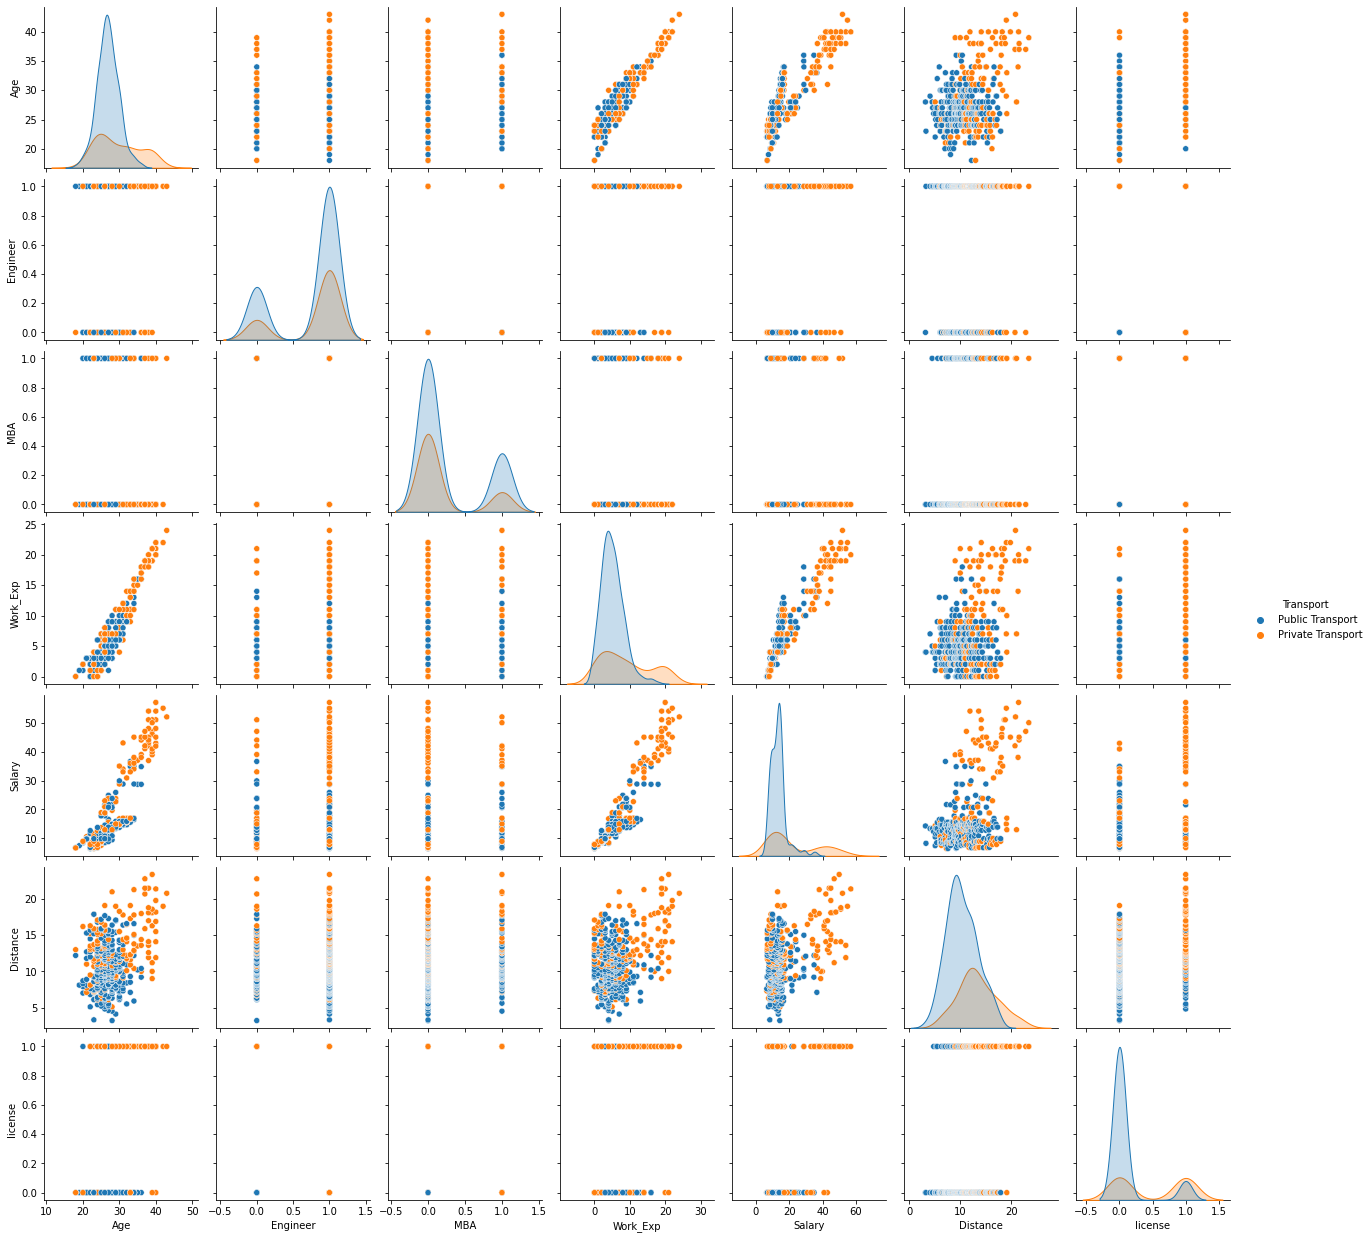

In [31]:
# For continuous variables
sns.pairplot(transport, diag_kind = 'kde', hue = 'Transport')

<AxesSubplot:>

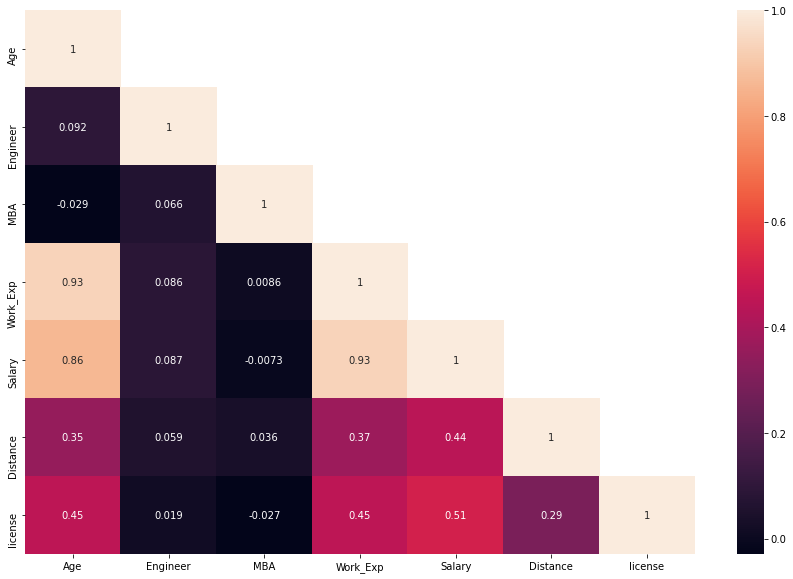

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(data = transport.corr(), annot = True, mask = np.triu(transport.corr(), 1))

### Bi-variate analysis between target variable and independent variables

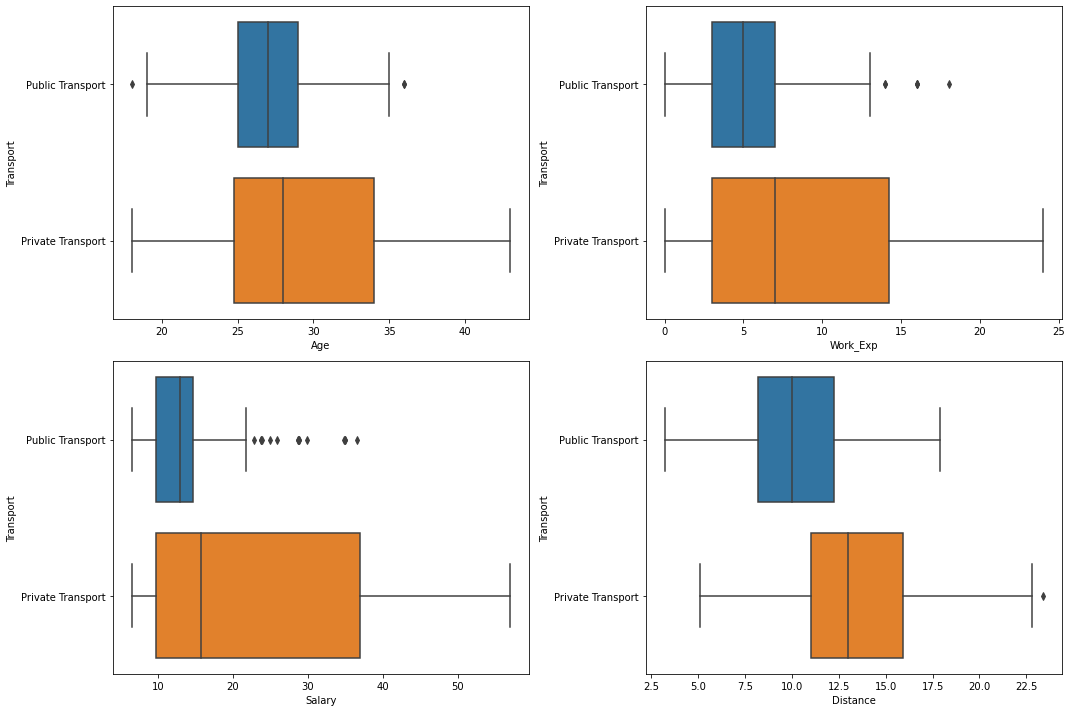

In [33]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.boxplot(x = transport['Age'], y = transport['Transport'])

plt.subplot(222)
sns.boxplot(x = transport['Work_Exp'], y = transport['Transport'])

plt.subplot(223)
sns.boxplot(x = transport['Salary'], y = transport['Transport'])

plt.subplot(224)
sns.boxplot(x = transport['Distance'], y = transport['Transport'])

plt.tight_layout()
plt.show()

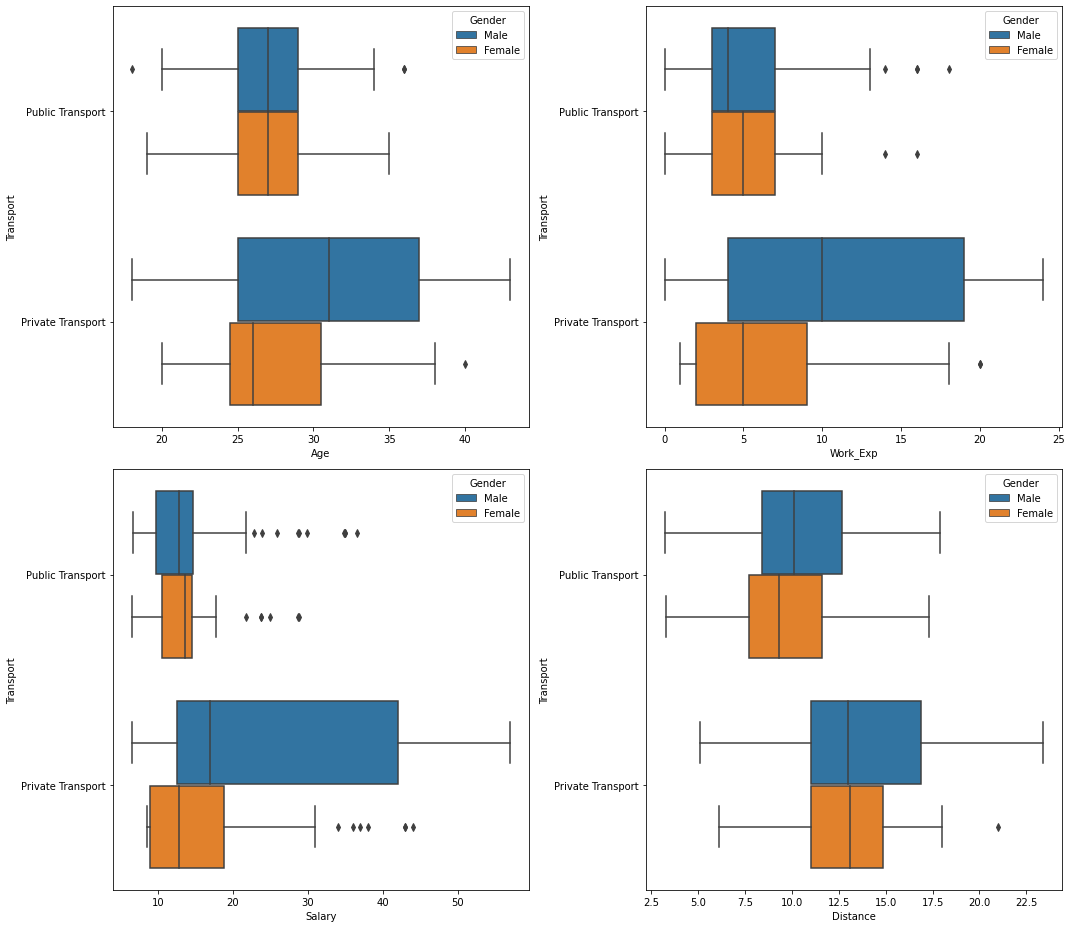

In [34]:
plt.figure(figsize=(15,13))

plt.subplot(221)
sns.boxplot(x = transport['Age'], y = transport['Transport'], hue = transport['Gender'])

plt.subplot(222)
sns.boxplot(x = transport['Work_Exp'], y = transport['Transport'], hue = transport['Gender'])

plt.subplot(223)
sns.boxplot(x = transport['Salary'], y = transport['Transport'], hue = transport['Gender'])

plt.subplot(224)
sns.boxplot(x = transport['Distance'], y = transport['Transport'], hue = transport['Gender'])

plt.tight_layout()
plt.show()

In [35]:
pd.DataFrame(data = transport.groupby("Transport").agg(['std', 'median'])).T

Transport        Private Transport  Public Transport
Age      std              6.040976          2.957642
         median          28.000000         27.000000
Engineer std              0.417191          0.437524
         median           1.000000          1.000000
MBA      std              0.402438          0.448098
         median           0.000000          0.000000
Work_Exp std              7.027364          3.163820
         median           7.000000          5.000000
Salary   std             15.151970          4.806996
         median          15.700000         12.900000
Distance std              3.850383          3.005370
         median          13.000000         10.000000
license  std              0.501697          0.313413
         median           0.000000          0.000000

## 1.3

### Encoding the categorical Varialbe

In [36]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [37]:
trans = transport.copy()

In [38]:
# To convert target variable
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [39]:
## Applying the created Label Encoder object for the target class
## Assigning the 1 to Public Transport and 0 to Private transport

trans['Transport'] = LE.fit_transform(trans['Transport'])
trans.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1


In [40]:
trans.tail()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,0
440,38,Male,1,0,19,44.0,21.5,1,0
441,37,Male,1,0,19,45.0,21.5,1,0
442,37,Male,0,0,19,47.0,22.8,1,0
443,39,Male,1,1,21,50.0,23.4,1,0


In [41]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 29.6+ KB


In [42]:
## Converting the Gender column by dummy variable
trans_dummy = pd.get_dummies(trans, drop_first = True)
trans_dummy.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport,Gender_Male
0,28,0,0,4,14.3,3.2,0,1,1
1,23,1,0,4,8.3,3.3,0,1,0
2,29,1,0,7,13.4,4.1,0,1,1
3,28,1,1,5,13.4,4.5,0,1,0
4,27,1,0,4,13.4,4.6,0,1,1


In [201]:
# for feature in trans.columns: 
#     if trans_dummy[feature].dtype == 'object': 
#         print('feature:',feature, '\n')
#         print(pd.Categorical(trans_dummy[feature].unique()))
#         print(pd.Categorical(trans_dummy[feature].unique()).codes)
#         trans_dummy[feature] = pd.Categorical(trans_dummy[feature]).codes

In [43]:
trans_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          444 non-null    int64  
 1   Engineer     444 non-null    int64  
 2   MBA          444 non-null    int64  
 3   Work_Exp     444 non-null    int64  
 4   Salary       444 non-null    float64
 5   Distance     444 non-null    float64
 6   license      444 non-null    int64  
 7   Transport    444 non-null    int32  
 8   Gender_Male  444 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), uint8(1)
memory usage: 26.6 KB


In [44]:
trans_dummy.Transport.value_counts(normalize=True)

1    0.675676
0    0.324324
Name: Transport, dtype: float64

#### Data Split

In [45]:
X = trans_dummy.drop("Transport", axis=1)

y = trans_dummy.pop("Transport")

X.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Gender_Male
0,28,0,0,4,14.3,3.2,0,1
1,23,1,0,4,8.3,3.3,0,0
2,29,1,0,7,13.4,4.1,0,1
3,28,1,1,5,13.4,4.5,0,0
4,27,1,0,4,13.4,4.6,0,1


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1, stratify = y)

In [47]:
print('Dimension of X_train is :',X_train.shape)
print('Dimension of X_test is  :', X_test.shape)
print('Dimension of y_train is :',y_train.shape)
print('Dimension of y_test is  :', y_test.shape)

Dimension of X_train is : (310, 8)
Dimension of X_test is  : (134, 8)
Dimension of y_train is : (310,)
Dimension of y_test is  : (134,)


#### Scaling the Data

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [49]:
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


## 1.4 Logistic Model

In [50]:
trans.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1


In [51]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 29.6+ KB


In [52]:
trans['Gender'] = LE.fit_transform(trans['Gender'])
trans.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1


In [53]:
import statsmodels.formula.api as SM

### Model 1: Logistic model with all variables

In [54]:
model_1 = SM.logit(formula = 'Transport~Age+Gender+Engineer+MBA+Work_Exp+Salary+Distance+license', data = trans).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.437944
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.3049
Time:                        14:29:05   Log-Likelihood:                -194.45
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 9.551e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8340      1.788     -0.466      0.641      -4.339       2.671
Age            0.2083      0.077      2.706      0.007       0.057       0.359
Gender         1.2810      0.288      4.441      0.000       0.716       1.846
Engineer      -0.1543      0.296     -0.521      0.603      -0.735       0.427
MBA            0.5601      0.314      1.782      0.075      -0.056       1.176
Work_Exp      -0.1005      0.100     -1.001      0.317      -0.297       0.096
Salary        -0.0805      0.040     -2.003      0.045      -0.159      -0.002
Distance      -0.2248      0.043     -5.290      0.000      -0.308      -0.142
license       -2.0463      0.334     -6.135      0.000      -2.700      -1.393
==============================================================================
"""

In [55]:
## Calculation VIF

def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = "y~x", data = x_vars).fit().rsquared  
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], " VIF = " , vif)

In [56]:
vif_cal(input_data = trans[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license']])

Age  VIF =  7.89
Gender  VIF =  1.07
Engineer  VIF =  1.02
MBA  VIF =  1.03
Work_Exp  VIF =  15.74
Salary  VIF =  8.87
Distance  VIF =  1.28
license  VIF =  1.45


In [57]:
model_2 = SM.logit(formula = 'Transport~Age+Gender+Engineer+MBA+Salary+Distance+license', data = trans).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.439069
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                            7
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.3032
Time:                        14:29:17   Log-Likelihood:                -194.95
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 3.014e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3889      1.317      0.295      0.768      -2.193       2.971
Age            0.1561      0.057      2.749      0.006       0.045       0.267
Gender         1.2805      0.287      4.454      0.000       0.717       1.844
Engineer      -0.1459      0.295     -0.494      0.622      -0.725       0.433
MBA            0.5265      0.311      1.690      0.091      -0.084       1.137
Salary        -0.1107      0.028     -4.000      0.000      -0.165      -0.056
Distance      -0.2193      0.042     -5.222      0.000      -0.302      -0.137
license       -2.0088      0.330     -6.089      0.000      -2.655      -1.362
==============================================================================
"""

In [58]:
vif_cal(input_data = trans[['Age', 'Gender', 'Engineer', 'MBA', 'Salary', 'Distance', 'license']])

Age  VIF =  3.89
Gender  VIF =  1.07
Engineer  VIF =  1.02
MBA  VIF =  1.02
Salary  VIF =  4.46
Distance  VIF =  1.26
license  VIF =  1.43


In [59]:
## Model building after removing Engineer having p-value > 0.05
model_3 = SM.logit(formula = 'Transport~Age+Gender+MBA+Salary+Distance+license', data = trans).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.439346
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.3027
Time:                        14:29:28   Log-Likelihood:                -195.07
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 6.095e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3196      1.310      0.244      0.807      -2.248       2.887
Age            0.1547      0.057      2.730      0.006       0.044       0.266
Gender         1.2758      0.287      4.446      0.000       0.713       1.838
MBA            0.5115      0.309      1.653      0.098      -0.095       1.118
Salary        -0.1105      0.028     -4.001      0.000      -0.165      -0.056
Distance      -0.2192      0.042     -5.217      0.000      -0.302      -0.137
license       -2.0004      0.329     -6.077      0.000      -2.646      -1.355
==============================================================================
"""

In [60]:
vif_cal(input_data = trans[['Age', 'Gender', 'MBA', 'Salary', 'Distance', 'license']])

Age  VIF =  3.89
Gender  VIF =  1.07
MBA  VIF =  1.02
Salary  VIF =  4.46
Distance  VIF =  1.26
license  VIF =  1.43


In [61]:
## Model building after removing MBA, p-value >0.05
model_4 = SM.logit(formula = 'Transport~Age+Gender+Salary+Distance+license', data = trans).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.442539
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.2977
Time:                        14:29:29   Log-Likelihood:                -196.49
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 3.988e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5268      1.297      0.406      0.685      -2.016       3.069
Age            0.1478      0.056      2.636      0.008       0.038       0.258
Gender         1.3271      0.285      4.650      0.000       0.768       1.886
Salary        -0.1060      0.027     -3.917      0.000      -0.159      -0.053
Distance      -0.2190      0.042     -5.197      0.000      -0.302      -0.136
license       -2.0216      0.329     -6.138      0.000      -2.667      -1.376
==============================================================================
"""

In [62]:
vif_cal(input_data = trans[['Age','Gender', 'Salary', 'Distance', 'license']])

Age  VIF =  3.88
Gender  VIF =  1.06
Salary  VIF =  4.45
Distance  VIF =  1.26
license  VIF =  1.43


In [63]:
trans.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression(solver = 'newton-cg', penalty='none')

In [66]:
Train, Test = train_test_split(trans, test_size=0.3, random_state=1, stratify = trans['Transport'])

In [67]:
model_t_1 = LogisticRegression(solver = 'newton-cg', penalty='none', max_iter=300)
model_t_1 = model_t_1.fit(Train[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license']], Train['Transport'])

# Predicting on the Training Data
model_t_1_pred_train = model_t_1.predict(Train[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license']])

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix

# cofusion matrix for training data
cnf_matrix = confusion_matrix(Train['Transport'], model_t_1_pred_train)
cnf_matrix

array([[ 59,  42],
       [ 14, 195]], dtype=int64)

In [69]:
# classification report for training data

report_1 = classification_report(Train['Transport'], model_t_1_pred_train)
print('Classification Report for Train set')
print(report_1)

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       101
           1       0.82      0.93      0.87       209

    accuracy                           0.82       310
   macro avg       0.82      0.76      0.78       310
weighted avg       0.82      0.82      0.81       310



In [70]:
# Predicting on the Test Data
model_t_1_pred_test = model_t_1.predict(Test[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license']])

# Getting probabilities for Test Data
model_t_1_pred_test_prob = model_t_1.predict_proba(Test[['Age', 'Gender', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license']])[:, 1]

In [71]:
# confusion matrix for test data
cnf_matrix_test = confusion_matrix(Test['Transport'], model_t_1_pred_test)
cnf_matrix_test

array([[24, 19],
       [ 7, 84]], dtype=int64)

In [72]:
report_test = classification_report(Test['Transport'], model_t_1_pred_test)
print('Classification Report for Test set')
print(report_test)

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        43
           1       0.82      0.92      0.87        91

    accuracy                           0.81       134
   macro avg       0.79      0.74      0.76       134
weighted avg       0.80      0.81      0.80       134



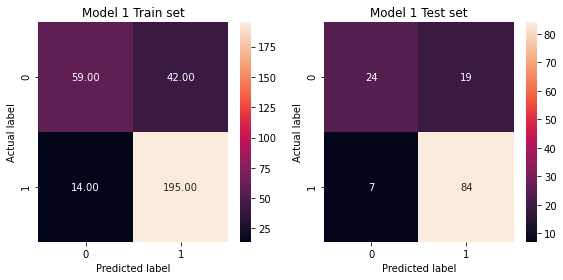

In [73]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("Model 1 Train set")
sns.heatmap(confusion_matrix(Train['Transport'], model_t_1_pred_train), annot = True, fmt = '.2f')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(122)
plt.title("Model 1 Test set")
sns.heatmap(confusion_matrix(Test['Transport'], model_t_1_pred_test), annot = True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.tight_layout()
plt.show()

In [74]:
## Final model for Descriptive i.e. model 4
model_t_4 = LogisticRegression(solver = 'newton-cg', penalty ='none', max_iter = 300)
model_t_4 = model_t_4.fit(Train[['Age', 'Gender', 'Salary', 'Distance', 'license']], Train['Transport'])

# Predicting on the Training Data
model_t_4_pred_train = model_t_4.predict(Train[['Age', 'Gender', 'Salary', 'Distance', 'license']])

In [75]:
# Predicting on the Test Data
model_t_4_pred_test = model_t_4.predict(Test[['Age', 'Gender', 'Salary', 'Distance', 'license']])

# Getting probabilities for Test Data
model_t_4_pred_test_prob = model_t_4.predict_proba(Test[['Age', 'Gender', 'Salary', 'Distance', 'license']])[:, 1]

In [76]:
cnf_matrix_test4 = confusion_matrix(Test['Transport'], model_t_4_pred_test)
cnf_matrix_test4

array([[23, 20],
       [ 5, 86]], dtype=int64)

In [77]:
report_test4 = classification_report(Train['Transport'], model_t_4_pred_train)
print('Classification Report for Train set')
print(report_test4)

Classification Report for Train set
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       101
           1       0.82      0.93      0.87       209

    accuracy                           0.81       310
   macro avg       0.81      0.75      0.77       310
weighted avg       0.81      0.81      0.80       310



In [78]:
report_test4 = classification_report(Test['Transport'], model_t_4_pred_test)
print('Classification Report for Test set')
print(report_test4)

Classification Report for Test set
              precision    recall  f1-score   support

           0       0.82      0.53      0.65        43
           1       0.81      0.95      0.87        91

    accuracy                           0.81       134
   macro avg       0.82      0.74      0.76       134
weighted avg       0.81      0.81      0.80       134



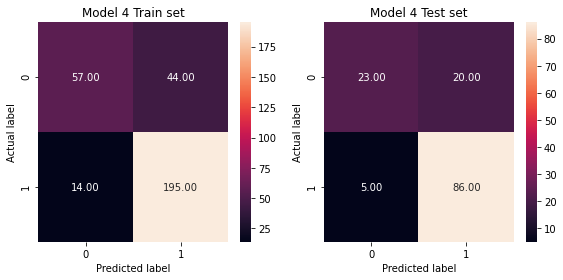

In [79]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("Model 4 Train set")
sns.heatmap(confusion_matrix(Train['Transport'], model_t_4_pred_train), annot = True, fmt = '.2f')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.subplot(122)
plt.title("Model 4 Test set")
sns.heatmap(confusion_matrix(Test['Transport'], model_t_4_pred_test), annot = True, fmt = '.2f')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

plt.tight_layout()
plt.show()

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

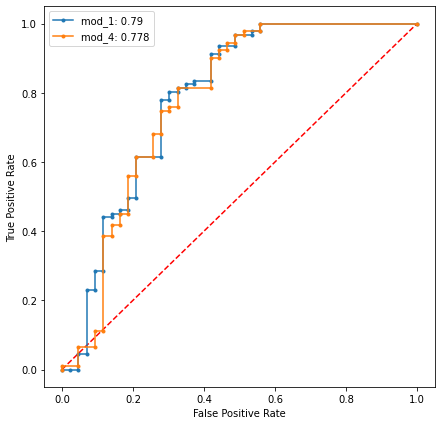

In [81]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(Test['Transport'], model_t_1_pred_test_prob) # Model 1
auc = roc_auc_score(Test['Transport'], model_t_1_pred_test_prob) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker = '.', label = 'mod_1: %.2f'% auc)

fpr4, tpr4, thresholds4 = roc_curve(Test['Transport'], model_t_4_pred_test_prob) # Model 2
auc = roc_auc_score(Test['Transport'], model_t_4_pred_test_prob) # getting AUC for the model
plt.plot(fpr4, tpr4, marker = '.', label = 'mod_4: %.3f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 1.5 KNN Model

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
print("Using Basic Model :", '\n')
print("Train Accuracy is : {}".format(accuracy_score(y_train, knn.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test, knn.predict(X_test))))
print('---------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, knn.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])))
print('---------------------------------------------')

print("\nConfusion matrix for  train set : ","\n",confusion_matrix(y_train, knn.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test, knn.predict(X_test)))

Using Basic Model : 

Train Accuracy is : 0.864516129032258

Test Accuracy is : 0.8134328358208955
---------------------------------------------

Train ROC-AUC score is : 0.9297219195603771

Test ROC-AUC score is : 0.8356759519550216
---------------------------------------------

Confusion matrix for  train set :  
 [[ 65  36]
 [  6 203]]

Confusion matrix for test set :  
 [[22 21]
 [ 4 87]]


In [85]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_predict = knn.predict(X_train)
model_score = knn.score(X_train, y_train)
print("Train set Basic Model\n")
print('Classification report\n',classification_report(y_train, y_train_predict))

Train set Basic Model

Classification report
               precision    recall  f1-score   support

           0       0.92      0.64      0.76       101
           1       0.85      0.97      0.91       209

    accuracy                           0.86       310
   macro avg       0.88      0.81      0.83       310
weighted avg       0.87      0.86      0.86       310



In [87]:
print('\nClassification report for Test default model\n')
print(classification_report(y_test, knn.predict(X_test)))


Classification report for Test default model

              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.81      0.96      0.87        91

    accuracy                           0.81       134
   macro avg       0.83      0.73      0.76       134
weighted avg       0.82      0.81      0.80       134



<AxesSubplot:title={'center':'Test set Basic'}>

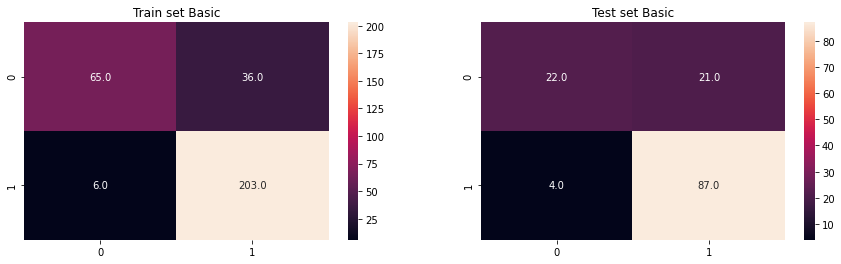

In [89]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Basic")
sns.heatmap(confusion_matrix(y_train, y_train_predict), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Basic")
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot = True, fmt = '.1f')

Text(0, 0.5, 'Accuracy score')

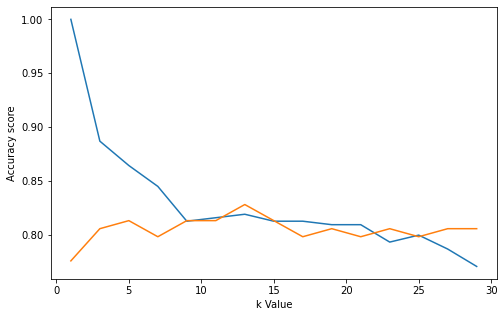

In [90]:
acc_train = []
acc_test = []
for k in range(1,30, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_pred_train = knn.score(X_train, y_train)
    acc_train.append(y_pred_train)
    
    y_pred_test = knn.score(X_test, y_test)
    acc_test.append(y_pred_test)
    
plt.figure(figsize=(8,5))
plt.plot(range(1,30,2) , acc_train)
plt.plot(range(1,30,2) , acc_test)
plt.xlabel('k Value')
plt.ylabel('Accuracy score')

In [91]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [93]:
from sklearn import metrics
## Performance Matrix on train data set
y_train_predict = knn.predict(X_train)
model_score = knn.score(X_train, y_train)
print('Train set for k = 9')
print('\nAccuracy :', model_score)
print('\nConfusion matrix :')
print(metrics.confusion_matrix(y_train, y_train_predict))
print('\nClassififcation report','\n')
print(metrics.classification_report(y_train, knn.predict(X_train)))

Train set for k = 9

Accuracy : 0.8129032258064516

Confusion matrix :
[[ 50  51]
 [  7 202]]

Classififcation report 

              precision    recall  f1-score   support

           0       0.88      0.50      0.63       101
           1       0.80      0.97      0.87       209

    accuracy                           0.81       310
   macro avg       0.84      0.73      0.75       310
weighted avg       0.82      0.81      0.80       310



In [94]:
## Performance Matrix on test data set
y_test_predict = knn.predict(X_test)
model_score = knn.score(X_test, y_test)
print("Test set for k = 9")
print('\nAccuracy : ', model_score)
print('\nConfusion matrix :')
print(metrics.confusion_matrix(y_test, y_test_predict))
print('\n', 'Classification report', '\n')
print(metrics.classification_report(y_test, knn.predict(X_test)))

Test set for k = 9

Accuracy :  0.8134328358208955

Confusion matrix :
[[21 22]
 [ 3 88]]

 Classification report 

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.80      0.97      0.88        91

    accuracy                           0.81       134
   macro avg       0.84      0.73      0.75       134
weighted avg       0.82      0.81      0.80       134



<AxesSubplot:title={'center':'Test set for k = 9'}>

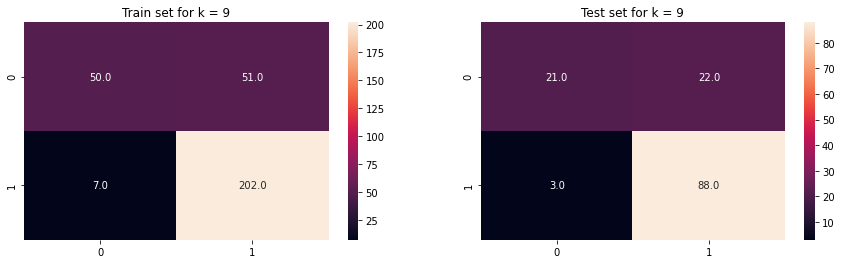

In [95]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set for k = 9")
sns.heatmap(confusion_matrix(y_train, y_train_predict), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set for k = 9")
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot = True, fmt = '.1f')

### Hyper Tunning on KNN model

In [96]:
params = {'n_neighbors' : [3,5,7,9,11,13], 'metric' : ['minkowski'],
          'algorithm' : ['auto', 'ball_tree','kd_tree','brute'], 'p' : [1,2],
         'leaf_size' : [5,10,15,20]}

In [97]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = params, refit = True, verbose = 1, n_jobs = -1, cv = 3)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20], 'metric': ['minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2]},
             verbose=1)

In [98]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'minkowski',
 'n_neighbors': 9,
 'p': 2}

In [99]:
Grid_train_predict = grid_knn.predict(X_train)
Grid_test_predict = grid_knn.predict(X_test)

In [100]:
print("Using Hyper-Tunned Model :", '\n')
print("Train Accuracy is : {}".format(accuracy_score(y_train, Grid_train_predict)))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test, Grid_test_predict)))
print('---------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, grid_knn.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:,1])))
print('---------------------------------------------')

print("\nConfusion matrix for  train set : ","\n",confusion_matrix(y_train, Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test, Grid_test_predict))

Using Hyper-Tunned Model : 

Train Accuracy is : 0.8129032258064516

Test Accuracy is : 0.8134328358208955
---------------------------------------------

Train ROC-AUC score is : 0.878843147472642

Test ROC-AUC score is : 0.7947866087400971
---------------------------------------------

Confusion matrix for  train set :  
 [[ 50  51]
 [  7 202]]

Confusion matrix for test set :  
 [[21 22]
 [ 3 88]]


In [101]:
print('Classification report Train set :')
print(classification_report(y_train, Grid_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.88      0.50      0.63       101
           1       0.80      0.97      0.87       209

    accuracy                           0.81       310
   macro avg       0.84      0.73      0.75       310
weighted avg       0.82      0.81      0.80       310



In [102]:
print('Classification report Test set :')
print(classification_report(y_test, Grid_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.80      0.97      0.88        91

    accuracy                           0.81       134
   macro avg       0.84      0.73      0.75       134
weighted avg       0.82      0.81      0.80       134



<AxesSubplot:title={'center':'Test set Tunned'}>

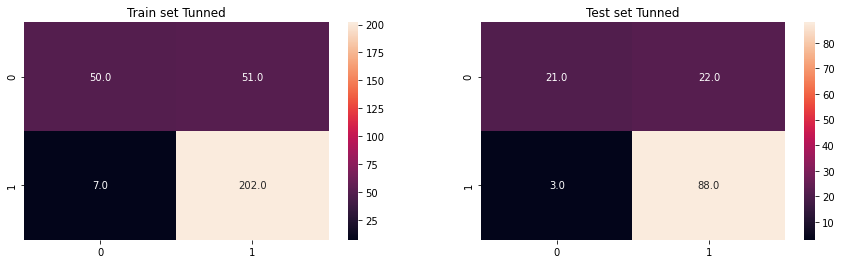

In [103]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Tunned")
sns.heatmap(confusion_matrix(y_train, Grid_train_predict), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Tunned")
sns.heatmap(confusion_matrix(y_test, Grid_test_predict), annot = True, fmt = '.1f')

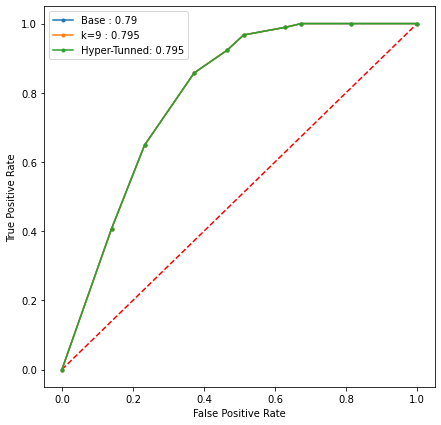

In [104]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(y_test, knn.predict_proba(X_test)[:,1]) # Model 1
auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker = '.', label = 'Base : %.2f'% auc)

fpr2, tpr2, thresholds2 = roc_curve(y_test, knn.predict_proba(X_test)[:,1]) # Model 2
auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]) # getting AUC for the model
plt.plot(fpr2, tpr2, marker = '.', label = 'k=9 : %.3f'% auc)

fpr3, tpr3, thresholds3 = roc_curve(y_test, grid_knn.predict_proba(X_test)[:,1]) # Model 2
auc = roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:,1]) # getting AUC for the model
plt.plot(fpr3, tpr3, marker = '.', label = 'Hyper-Tunned: %.3f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 1.6 Bagging and Boosting

### Bagging

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [106]:
## Bagging with default values
bag= BaggingClassifier(random_state= 1)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [107]:
print("Bagging Basic Model")
print("\nTrain Accuracy is : {}".format(accuracy_score(y_train, bag.predict(X_train))))
print("Test Accuracy is : {}".format(accuracy_score(y_test, bag.predict(X_test))))
print('------------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, bag.predict_proba(X_train)[:,1])))
print("Test ROC-AUC score is : {}".format(roc_auc_score(y_test, bag.predict_proba(X_test)[:,1])))
print('------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train, bag.predict(X_train)))
print("Confusion matrix for test set : ","\n",confusion_matrix(y_test, bag.predict(X_test)))

Bagging Basic Model

Train Accuracy is : 1.0
Test Accuracy is : 0.8208955223880597
------------------------------------------------

Train ROC-AUC score is : 1.0
Test ROC-AUC score is : 0.8481983133145924
------------------------------------------------

Confusion matrix for train set :  
 [[101   0]
 [  0 209]]
Confusion matrix for test set :  
 [[28 15]
 [ 9 82]]


In [108]:
print('Classification report Train set :')
print(classification_report(y_train, bag.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       209

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [109]:
print('Classification report Test set :')
print(classification_report(y_test, bag.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        43
           1       0.85      0.90      0.87        91

    accuracy                           0.82       134
   macro avg       0.80      0.78      0.79       134
weighted avg       0.82      0.82      0.82       134



<AxesSubplot:title={'center':'Test set Basic'}>

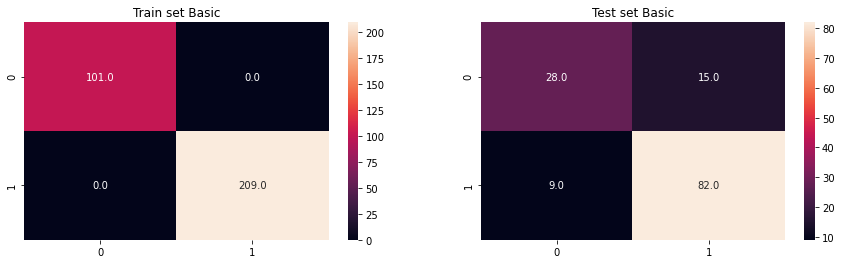

In [110]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Basic")
sns.heatmap(confusion_matrix(y_train, bag.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Basic")
sns.heatmap(confusion_matrix(y_test, bag.predict(X_test)), annot = True, fmt = '.1f')


### Hyperparameter tuning of Bagging Classifier -

In [111]:
param_bag = {'base_estimator':[LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()],
             'max_samples':[0.3,0.5,0.7,0.9], 'n_estimators' :[10,30,50,100,501],
             'max_features': [1,2,3,4,6,7,8,9], 'random_state': [1]}

In [112]:
grid_bag = GridSearchCV(BaggingClassifier(), param_grid = param_bag, refit = True, verbose = True, n_jobs = -1, cv = 3)
grid_bag.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(),
                                            DecisionTreeClassifier(),
                                            RandomForestClassifier()],
                         'max_features': [1, 2, 3, 4, 6, 7, 8, 9],
                         'max_samples': [0.3, 0.5, 0.7, 0.9],
                         'n_estimators': [10, 30, 50, 100, 501],
                         'random_state': [1]},
             verbose=True)

In [113]:
grid_bag.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'max_features': 8,
 'max_samples': 0.9,
 'n_estimators': 100,
 'random_state': 1}

In [114]:
print('Bagging Tunned with base estimator: LR, DT and RF')
print("\nTrain Accuracy is : {}".format(accuracy_score(y_train, grid_bag.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test, grid_bag.predict(X_test))))
print('------------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, grid_bag.predict_proba(X_train)[:,1])))
print("Test ROC-AUC score is : {}".format(roc_auc_score(y_test, grid_bag.predict_proba(X_test)[:,1])))
print('------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train, grid_bag.predict(X_train)))
print("Confusion matrix for test set : ","\n",confusion_matrix(y_test, grid_bag.predict(X_test)))

Bagging Tunned with base estimator: LR, DT and RF

Train Accuracy is : 1.0

Test Accuracy is : 0.8432835820895522
------------------------------------------------

Train ROC-AUC score is : 1.0
Test ROC-AUC score is : 0.8657040633784819
------------------------------------------------

Confusion matrix for train set :  
 [[101   0]
 [  0 209]]
Confusion matrix for test set :  
 [[27 16]
 [ 5 86]]


In [115]:
print('Classification report Train set :')
print(classification_report(y_train,grid_bag.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       209

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [116]:
print('Classification report Test set :')
print(classification_report(y_test,grid_bag.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        43
           1       0.84      0.95      0.89        91

    accuracy                           0.84       134
   macro avg       0.84      0.79      0.81       134
weighted avg       0.84      0.84      0.84       134



In [117]:
auc_basic = roc_auc_score(y_test, bag.predict_proba(X_test)[:,1])
auc_tuned = roc_auc_score(y_test, grid_bag.predict_proba(X_test)[:,1])

In [118]:
# plt.figure(figsize=(7,7))
# plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line
# plt.title("Bagging Classifier Basic and Tunned comparision")
# # calculate roc curve for base model
# lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, bag.predict_proba(X_test)[:,1])

# # plot the roc curve for the model
# plt.plot(lr_fpr, lr_tpr, marker='.', label='Base : %.3f'% auc_basic)

# # roc curve for tunned model
# lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, grid_bag.predict_proba(X_test)[:,1])
# # plot the roc curve for the model
# plt.plot(lr_fpr, lr_tpr, marker='.', label='Tunned : %.3f'% auc_tuned)

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

### Bagging with Random Forest as only Base estimator

In [119]:
param_rf = {'base_estimator':[RandomForestClassifier()],'max_samples':[0.6,0.7],'max_features':[0.2,0.5,0.6],
             'n_estimators' :[50,100,151],'random_state': [1]}

In [120]:
grid_bag_rf = GridSearchCV(BaggingClassifier(), param_grid = param_rf, refit = True, verbose = True, n_jobs = -1, cv = 3)
grid_bag_rf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [RandomForestClassifier()],
                         'max_features': [0.2, 0.5, 0.6],
                         'max_samples': [0.6, 0.7],
                         'n_estimators': [50, 100, 151], 'random_state': [1]},
             verbose=True)

In [121]:
grid_bag_rf.best_params_

{'base_estimator': RandomForestClassifier(),
 'max_features': 0.5,
 'max_samples': 0.6,
 'n_estimators': 100,
 'random_state': 1}

In [122]:
print("Bagging [Random Forest]")
print("\nTrain Accuracy is : {}".format(accuracy_score(y_train,grid_bag_rf.predict(X_train))))
print("Test Accuracy is    : {}".format(accuracy_score(y_test,grid_bag_rf.predict(X_test))))
print('------------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_bag_rf.predict_proba(X_train)[:,1])))
print("Test ROC-AUC score is    : {}".format(roc_auc_score(y_test,grid_bag_rf.predict_proba(X_test)[:,1])))
print('-------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_bag_rf.predict(X_train)))
print("Confusion matrix for test set    : ","\n",confusion_matrix(y_test,grid_bag_rf.predict(X_test)))

Bagging [Random Forest]

Train Accuracy is : 0.896774193548387
Test Accuracy is    : 0.7985074626865671
------------------------------------------------

Train ROC-AUC score is : 0.9920886825524657
Test ROC-AUC score is    : 0.8512650140557118
-------------------------------------------------

Confusion matrix for train set :  
 [[ 72  29]
 [  3 206]]
Confusion matrix for test set    :  
 [[20 23]
 [ 4 87]]


In [123]:
print('Classification report Train set :')
print(classification_report(y_train,grid_bag_rf.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.96      0.71      0.82       101
           1       0.88      0.99      0.93       209

    accuracy                           0.90       310
   macro avg       0.92      0.85      0.87       310
weighted avg       0.90      0.90      0.89       310



In [124]:
print('Classification report Test set :')
print(classification_report(y_test,grid_bag_rf.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.79      0.96      0.87        91

    accuracy                           0.80       134
   macro avg       0.81      0.71      0.73       134
weighted avg       0.80      0.80      0.78       134



<AxesSubplot:title={'center':'Test set Bagging (RF)'}>

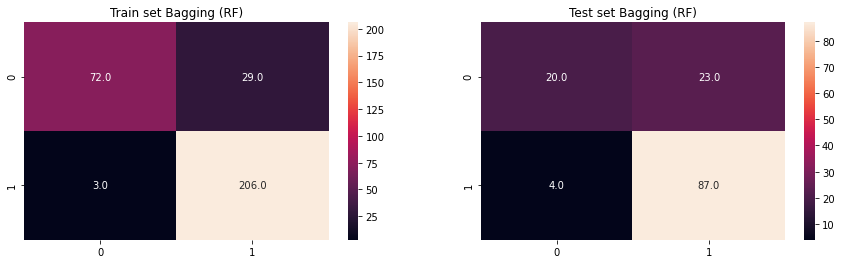

In [125]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Bagging (RF)")
sns.heatmap(confusion_matrix(y_train, grid_bag_rf.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Bagging (RF)")
sns.heatmap(confusion_matrix(y_test, grid_bag_rf.predict(X_test)), annot = True, fmt = '.1f')


In [126]:
auc_basic = roc_auc_score(y_test, bag.predict_proba(X_test)[:,1])
auc_tuned = roc_auc_score(y_test, grid_bag.predict_proba(X_test)[:,1])
auc_tunedRF = roc_auc_score(y_test, grid_bag_rf.predict_proba(X_test)[:,1])

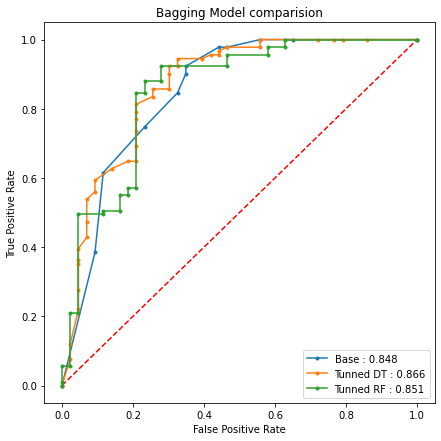

In [127]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line
plt.title("Bagging Model comparision")

# calculate roc curve for base model
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, bag.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Base : %.3f'% auc_basic)

# roc curve for tunned model
lr_fpr1, lr_tpr1, lr_threshold1 = roc_curve(y_test, grid_bag.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Tunned DT : %.3f'% auc_tuned)

# roc curve for hyper-tunned model
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, grid_bag_rf.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Tunned RF : %.3f'% auc_tunedRF)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Random Forest

In [128]:

RF=RandomForestClassifier()

#Train the model using the training sets y_pred = clf.predict(X_test)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = RF.predict(X_test)

model_trainRF = RF.score(X_train, y_train)
model_testRF = RF.score(X_test, y_test)

In [130]:
print("Random Forest BASE model")
print("-------------------------------------------------")
print("\nTrain accuracy :", model_trainRF)
print("Test accuracy  :", model_testRF)
print('-------------------------------------------------')
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, RF.predict_proba(X_train)[:,1])))
print("Test ROC-AUC score is    : {}".format(roc_auc_score(y_test, RF.predict_proba(X_test)[:,1])))
print('-------------------------------------------------')
print('\nConfusion matrix train model\n', metrics.confusion_matrix(y_train, RF.predict(X_train)))
print('\nConfusion matrix test model\n', metrics.confusion_matrix(y_test, y_pred))

Random Forest BASE model
-------------------------------------------------

Train accuracy : 1.0
Test accuracy  : 0.835820895522388
-------------------------------------------------

Train ROC-AUC score is : 1.0
Test ROC-AUC score is    : 0.8795042167135191
-------------------------------------------------

Confusion matrix train model
 [[101   0]
 [  0 209]]

Confusion matrix test model
 [[25 18]
 [ 4 87]]


<AxesSubplot:title={'center':'Test set Basic RF'}>

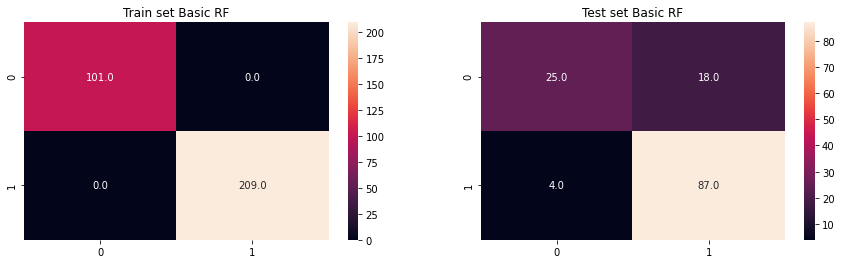

In [131]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Basic RF")
sns.heatmap(metrics.confusion_matrix(y_train, RF.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Basic RF")
sns.heatmap(metrics.confusion_matrix(y_test, RF.predict(X_test)), annot = True, fmt = '.1f')

In [132]:
param = {'max_depth': [7, 10],
         'max_features': [4, 6],
         'min_samples_leaf': [50, 100],
         'min_samples_split': [150, 300],
         'n_estimators': [50, 100,301]}

In [133]:
rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param, cv = 3, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [50, 100, 301]},
             verbose=1)

In [134]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 50}

In [135]:
best_grid = grid_search.best_estimator_

In [136]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [137]:
print("Random Forest tunned model")
print("--------------------------------------------------")
print("\nTrain accuracy :", best_grid.score(X_train, y_train))
print("Test accuracy  :", best_grid.score(X_test, y_test))
print('----------------------------------------------------')
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Test ROC-AUC score is    : {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print('---------------------------------------------------')
print('\nConfusion matrix train model\n', metrics.confusion_matrix(y_train, best_grid.predict(X_train)))
print('\nConfusion matrix test model\n', metrics.confusion_matrix(y_test, best_grid.predict(X_test)))


Random Forest tunned model
--------------------------------------------------

Train accuracy : 0.7870967741935484
Test accuracy  : 0.7611940298507462
----------------------------------------------------

Train ROC-AUC score is : 0.7964138519115069
Test ROC-AUC score is    : 0.731408126756964
---------------------------------------------------

Confusion matrix train model
 [[ 46  55]
 [ 11 198]]

Confusion matrix test model
 [[18 25]
 [ 7 84]]


In [138]:
print('Classification report Train set :\n')
print(classification_report(y_train, best_grid.predict(X_train)))

Classification report Train set :

              precision    recall  f1-score   support

           0       0.81      0.46      0.58       101
           1       0.78      0.95      0.86       209

    accuracy                           0.79       310
   macro avg       0.79      0.70      0.72       310
weighted avg       0.79      0.79      0.77       310



In [139]:
print('Classification report Test set :\n')
print(classification_report(y_test, best_grid.predict(X_test)))

Classification report Test set :

              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.77      0.92      0.84        91

    accuracy                           0.76       134
   macro avg       0.75      0.67      0.68       134
weighted avg       0.75      0.76      0.74       134



<AxesSubplot:title={'center':'Test set Tunned RF'}>

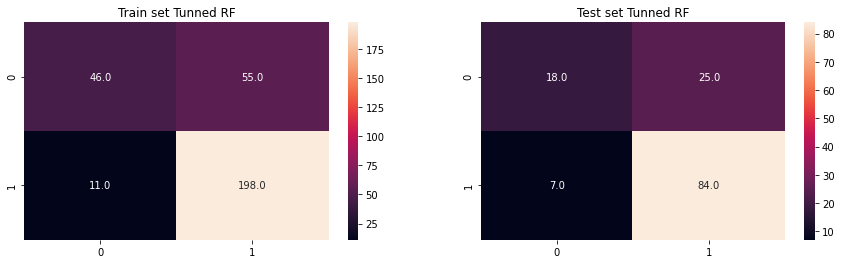

In [140]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Tunned RF")
sns.heatmap(metrics.confusion_matrix(y_train, best_grid.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Tunned RF")
sns.heatmap(metrics.confusion_matrix(y_test, best_grid.predict(X_test)), annot = True, fmt = '.1f')

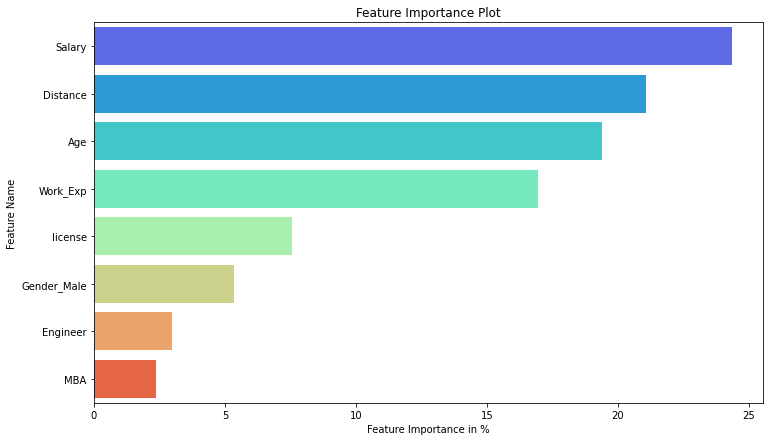

In [141]:
Importance = pd.DataFrame(RF.feature_importances_*100, index = X.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(12,7))
sns.barplot(Importance[0], Importance.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [142]:
auc_basic = roc_auc_score(y_test, RF.predict_proba(X_test)[:,1])
auc_tuned = roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])

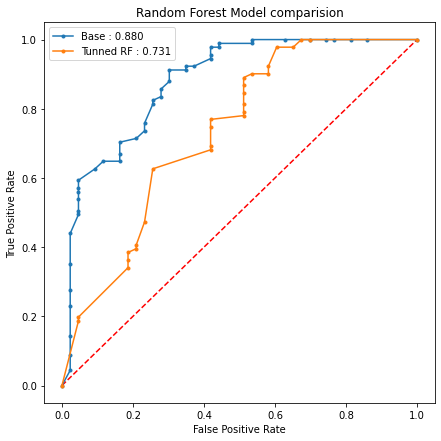

In [143]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line
plt.title("Random Forest Model comparision")

# calculate roc curve for base model
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Base : %.3f'% auc_basic)

# roc curve for tunned model
lr_fpr1, lr_tpr1, lr_threshold1 = roc_curve(y_test, best_grid.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Tunned RF : %.3f'% auc_tuned)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Boosting
### Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [145]:
print("Gradient Boosting Basic")
print("\nTrain Accuracy is : {}".format(accuracy_score(y_train, gbc.predict(X_train))))
print("Test Accuracy is  : {}".format(accuracy_score(y_test, gbc.predict(X_test))))
print('-------------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, gbc.predict_proba(X_train)[:,1])))
print("Test ROC-AUC score is    : {}".format(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])))
print('--------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train, gbc.predict(X_train)))
print("\nConfusion matrix for test set  : ","\n",confusion_matrix(y_test, gbc.predict(X_test)))

Gradient Boosting Basic

Train Accuracy is : 0.967741935483871
Test Accuracy is  : 0.8134328358208955
-------------------------------------------------

Train ROC-AUC score is : 0.9986735515656828
Test ROC-AUC score is    : 0.8634040378226425
--------------------------------------------------

Confusion matrix for train set :  
 [[ 92   9]
 [  1 208]]

Confusion matrix for test set  :  
 [[26 17]
 [ 8 83]]


In [146]:
print('Classification report Train set :')
print(classification_report(y_train, gbc.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       101
           1       0.96      1.00      0.98       209

    accuracy                           0.97       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



In [147]:
print('Classification report Test set :')
print(classification_report(y_test, gbc.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.76      0.60      0.68        43
           1       0.83      0.91      0.87        91

    accuracy                           0.81       134
   macro avg       0.80      0.76      0.77       134
weighted avg       0.81      0.81      0.81       134



<AxesSubplot:title={'center':'Test set Gradient Boosting Basic'}>

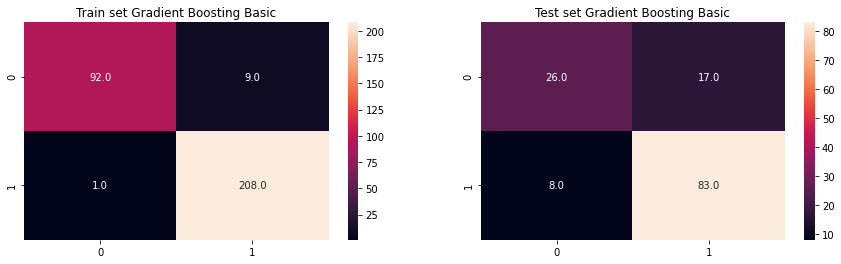

In [148]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Gradient Boosting Basic")
sns.heatmap(metrics.confusion_matrix(y_train, gbc.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Gradient Boosting Basic")
sns.heatmap(metrics.confusion_matrix(y_test, gbc.predict(X_test)), annot = True, fmt = '.1f')

#### Hyperparameter tuning of Gradient Boosting Classifier-

In [149]:
param_gbc={'learning_rate': [0.01,0.02,0.05], 'max_depth':[3,5,7],
            'min_samples_split': [7,9,11,13], 'n_estimators':[100,200],'random_state': [1]}    

In [150]:
grid_gbc_2 = GridSearchCV(GradientBoostingClassifier(), param_grid = param_gbc, refit = True, verbose = True,
                          n_jobs = -1, cv = 3)
grid_gbc_2.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [7, 9, 11, 13],
                         'n_estimators': [100, 200], 'random_state': [1]},
             verbose=True)

In [151]:
grid_gbc_2.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 9,
 'n_estimators': 100,
 'random_state': 1}

In [152]:
print("Gradient Boosting Tunned")
print("\nTrain Accuracy is : {}".format(accuracy_score(y_train, grid_gbc_2.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test, grid_gbc_2.predict(X_test))))
print('------------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, grid_gbc_2.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test, grid_gbc_2.predict_proba(X_test)[:,1])))
print('-------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train, grid_gbc_2.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test, grid_gbc_2.predict(X_test)))

Gradient Boosting Tunned

Train Accuracy is : 0.9258064516129032

Test Accuracy is : 0.8283582089552238
------------------------------------------------

Train ROC-AUC score is : 0.9808612440191387

Test ROC-AUC score is : 0.8526705852287247
-------------------------------------------------

Confusion matrix for train set :  
 [[ 78  23]
 [  0 209]]

Confusion matrix for test set :  
 [[23 20]
 [ 3 88]]


In [153]:
print('Classification report Train set :', '\n')
print(classification_report(y_train, grid_gbc_2.predict(X_train)))

Classification report Train set : 

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       101
           1       0.90      1.00      0.95       209

    accuracy                           0.93       310
   macro avg       0.95      0.89      0.91       310
weighted avg       0.93      0.93      0.92       310



In [154]:
print('Classification report Test set :', '\n')
print(classification_report(y_test,grid_gbc_2.predict(X_test)))


Classification report Test set : 

              precision    recall  f1-score   support

           0       0.88      0.53      0.67        43
           1       0.81      0.97      0.88        91

    accuracy                           0.83       134
   macro avg       0.85      0.75      0.78       134
weighted avg       0.84      0.83      0.81       134



<AxesSubplot:title={'center':'Test set Tunned Gradient Boosting'}>

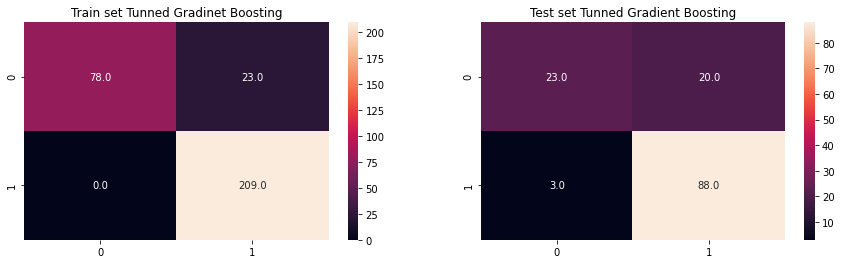

In [155]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set Tunned Gradinet Boosting")
sns.heatmap(metrics.confusion_matrix(y_train, grid_gbc_2.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set Tunned Gradient Boosting")
sns.heatmap(metrics.confusion_matrix(y_test, grid_gbc_2.predict(X_test)), annot = True, fmt = '.1f')

In [156]:
auc_basic = roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])
auc_tun = roc_auc_score(y_test, grid_gbc_2.predict_proba(X_test)[:,1])

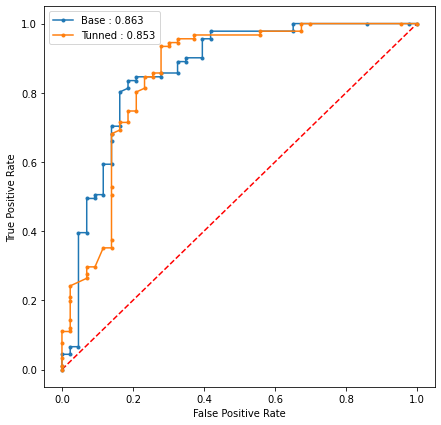

In [157]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

# calculate roc curve for base model
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Base : %.3f'% auc_basic)

# roc curve for tunned model
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, grid_gbc_2.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Tunned : %.3f'% auc_tun)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Adaptive boosting: ADABoost

In [158]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [159]:
print("Train Accuracy is : {}".format(accuracy_score(y_train, ada.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test, ada.predict(X_test))))
print('------------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, ada.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test, ada.predict_proba(X_test)[:,1])))
print('-------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train, ada.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test, ada.predict(X_test)))

Train Accuracy is : 0.8870967741935484

Test Accuracy is : 0.8432835820895522
------------------------------------------------

Train ROC-AUC score is : 0.9498791984461603

Test ROC-AUC score is : 0.8349092767697419
-------------------------------------------------

Confusion matrix for train set :  
 [[ 69  32]
 [  3 206]]

Confusion matrix for test set :  
 [[26 17]
 [ 4 87]]


In [160]:
print('Classification report Train set basic:', '\n')
print(classification_report(y_train, ada.predict(X_train)))

Classification report Train set basic: 

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       101
           1       0.87      0.99      0.92       209

    accuracy                           0.89       310
   macro avg       0.91      0.83      0.86       310
weighted avg       0.90      0.89      0.88       310



In [161]:
print('Classification report Test set basic :', '\n')
print(classification_report(y_test, ada.predict(X_test)))

Classification report Test set basic : 

              precision    recall  f1-score   support

           0       0.87      0.60      0.71        43
           1       0.84      0.96      0.89        91

    accuracy                           0.84       134
   macro avg       0.85      0.78      0.80       134
weighted avg       0.85      0.84      0.83       134



<AxesSubplot:title={'center':'Test set AdaBoost Basic'}>

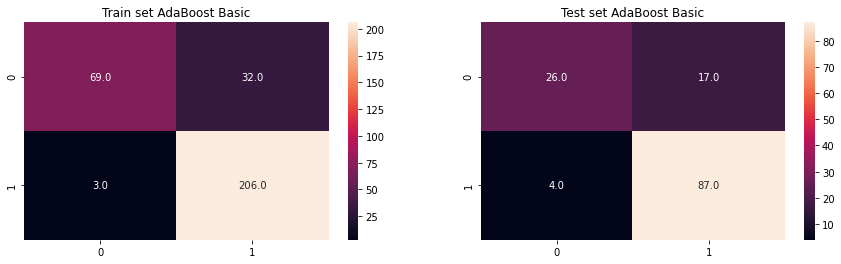

In [162]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set AdaBoost Basic")
sns.heatmap(metrics.confusion_matrix(y_train, ada.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set AdaBoost Basic")
sns.heatmap(metrics.confusion_matrix(y_test, ada.predict(X_test)), annot = True, fmt = '.1f')

#### HyperParameter tunning :

In [163]:
param_ada = {'learning_rate': [1,2,3,6,8],
            'n_estimators' : [50,100], 'random_state': [1]}    

In [164]:
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid = param_ada, refit = True, verbose = True, n_jobs = -1, cv = 3)
grid_ada.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3, 6, 8],
                         'n_estimators': [50, 100], 'random_state': [1]},
             verbose=True)

In [165]:
grid_ada.best_params_

{'learning_rate': 1, 'n_estimators': 50, 'random_state': 1}

In [166]:
print("Train Accuracy is : {}".format(accuracy_score(y_train, grid_ada.predict(X_train))))
print("\nTest Accuracy is : {}".format(accuracy_score(y_test, grid_ada.predict(X_test))))
print('---------------------------------------------')

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train, grid_ada.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test, grid_ada.predict_proba(X_test)[:,1])))
print('-------------------------------------------------')

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train, grid_ada.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test, grid_ada.predict(X_test)))

Train Accuracy is : 0.8870967741935484

Test Accuracy is : 0.8432835820895522
---------------------------------------------

Train ROC-AUC score is : 0.9498791984461603

Test ROC-AUC score is : 0.8349092767697419
-------------------------------------------------

Confusion matrix for train set :  
 [[ 69  32]
 [  3 206]]

Confusion matrix for test set :  
 [[26 17]
 [ 4 87]]


In [167]:
print('Classification report Train set :', '\n')
print(classification_report(y_train, grid_ada.predict(X_train)))

Classification report Train set : 

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       101
           1       0.87      0.99      0.92       209

    accuracy                           0.89       310
   macro avg       0.91      0.83      0.86       310
weighted avg       0.90      0.89      0.88       310



In [168]:
print('Classification report Test set :', '\n')
print(classification_report(y_test, grid_ada.predict(X_test)))

Classification report Test set : 

              precision    recall  f1-score   support

           0       0.87      0.60      0.71        43
           1       0.84      0.96      0.89        91

    accuracy                           0.84       134
   macro avg       0.85      0.78      0.80       134
weighted avg       0.85      0.84      0.83       134



<AxesSubplot:title={'center':'Test set AdaBoost Tunned'}>

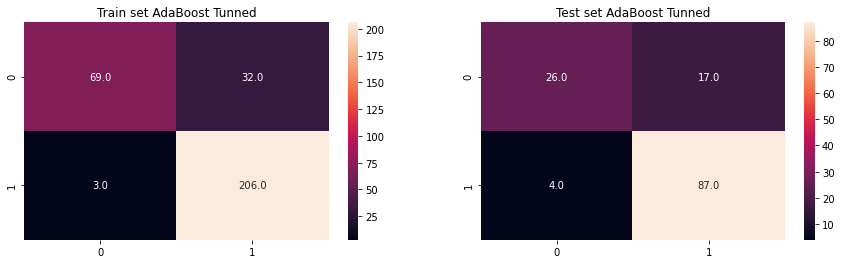

In [169]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.title("Train set AdaBoost Tunned")
sns.heatmap(metrics.confusion_matrix(y_train, grid_ada.predict(X_train)), annot = True, fmt = '.1f')
plt.subplot(122)
plt.title("Test set AdaBoost Tunned")
sns.heatmap(metrics.confusion_matrix(y_test, grid_ada.predict(X_test)), annot = True, fmt = '.1f')

In [170]:
auc_basic = roc_auc_score(y_test, ada.predict_proba(X_test)[:,1])
auc_tun = roc_auc_score(y_test, grid_ada.predict_proba(X_test)[:,1])

Boosting Classifier Basic: ROC AUC=0.835
Boosting classifier tunned: ROC AUC=0.835


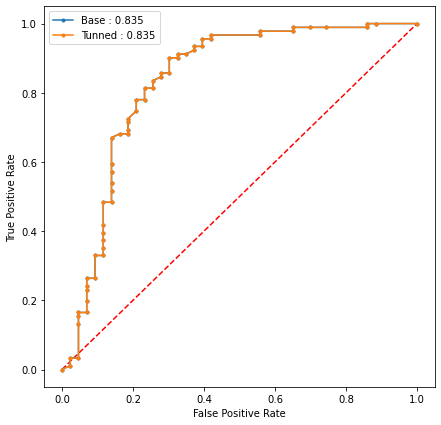

In [171]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

#Basic
lr_probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting Classifier Basic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Base : %.3f'% auc_basic)

#tunned
lr_probs = grid_ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Boosting classifier tunned: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Tunned : %.3f'% auc_tun)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Model Comparision

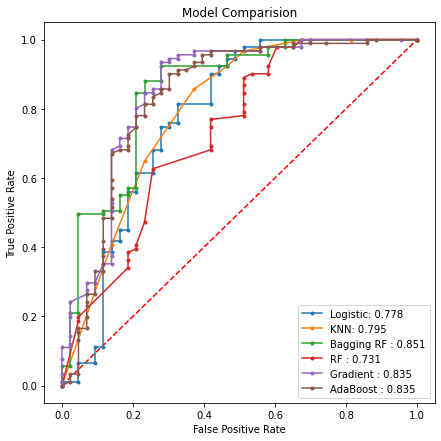

In [172]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line
plt.title("Model Comparision")

# Logistic
fpr4, tpr4, thresholds4 = roc_curve(Test['Transport'], model_t_4_pred_test_prob)
auc = roc_auc_score(Test['Transport'], model_t_4_pred_test_prob)
plt.plot(fpr4, tpr4, marker = '.', label = 'Logistic: %.3f'% auc)

#KNN
fpr3, tpr3, thresholds3 = roc_curve(y_test, grid_knn.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:,1])
plt.plot(fpr3, tpr3, marker = '.', label = 'KNN: %.3f'% auc)

#Bagging
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, grid_bag_rf.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Bagging RF : %.3f'% auc_tunedRF)

#RF
lr_fpr1, lr_tpr1, lr_threshold1 = roc_curve(y_test, best_grid.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='RF : %.3f'% auc_tuned)

#Gradient Boost
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, grid_gbc_2.predict_proba(X_test)[:,1])
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gradient : %.3f'% auc_tun)

# AdaBoost
lr_probs = grid_ada.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='AdaBoost : %.3f'% lr_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [173]:
# from sklearn import model_selection
# from sklearn.model_selection import cross_val_score

In [174]:
# models = []
# models.append(('LR' , LogisticRegression(max_iter = 10000)))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('Bagging', BaggingClassifier()))
# models.append(('Random forest', RandomForestClassifier()))
# models.append(('AdaBoost', AdaBoostClassifier()))
# models.append(('Gradient Boost', GradientBoostingClassifier()))

In [175]:
# results = []
# names = []

# for name, model in models:
#   kfold = model_selection.KFold(n_splits = 7)
#   cv_results = model_selection.cross_val_score(model, X_train , y_train , cv = kfold , scoring = 'accuracy' )
#   results.append(cv_results)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.mean() , cv_results.std())
#   print(msg)

In [178]:
# results = []
# names = []

# for name, model in models:
#   kfold = model_selection.KFold(n_splits = 7)
#   cv_results = model_selection.cross_val_score(model, X_test , y_test , cv = kfold , scoring = 'accuracy' )
#   results.append(cv_results)
#   names.append(name)
#   msg = "%s: %f (%f)" % (name, cv_results.mean() , cv_results.std())
# print(msg)

In [177]:
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.xticks(rotation = 90)